## Regresión Logística - Titanic
## Universidad Nacional Abierta y a Distancia - UNAD

Contiene información sobre los pasajeros del Titanic

In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Pasos de la Actividad
### 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
# lectura de datos en Python
Datos = pd.read_csv('C:/Users/famil/Documents/andrea/UNAD/Periodo 3/Análisis de Datos/Titanic-Dataset.csv', encoding='iso-8859-1')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Información de los datos
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Imprimir el número de filas y columnas
num_filas, num_columnas = Datos.shape
print("N° Filas:", num_filas)
print("N° Columnas:", num_columnas)

N° Filas: 891
N° Columnas: 12


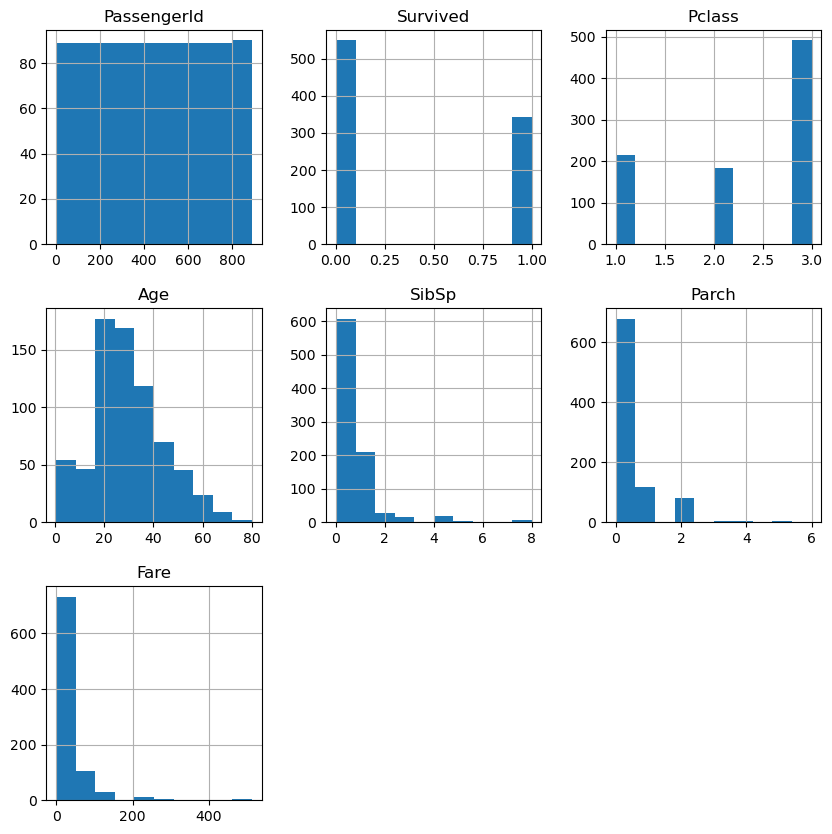

In [7]:
#Visualización de los datos 
Datos.hist(figsize=(10, 10))
plt.show()

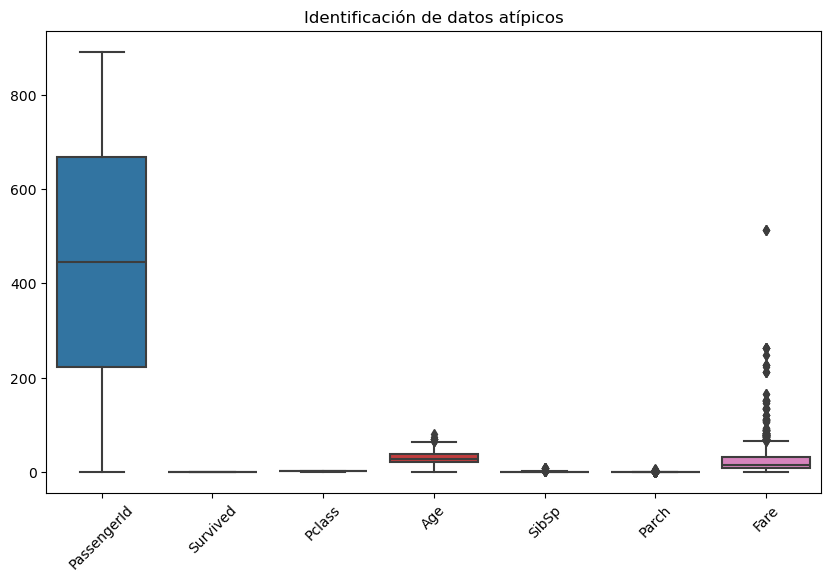

In [8]:
#Identifica de Datos atipicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos)
plt.xticks(rotation=45)
plt.title('Identificación de datos atípicos')
plt.show()

### 2.Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario 

In [9]:
# Revisión de datos faltantes
valores_faltantes = Datos.isnull().sum()

# Muestra las columnas que tienen datos faltantes junto con la cantidad
print("\033[1mDatos faltantes:\033[0m")
print(valores_faltantes)

Datos faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
summary_statistics = Datos.describe()
print("Estadísticas Resumen:")
print(summary_statistics)

Estadísticas Resumen:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:

- Sobrevivientes: si la persona sobrevivio al hundimiento o no (0 = **NO** sobrevivio - 1 = **SI** sobrevivio)

In [11]:
# Total de personas sobrevivientes
Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
Datos[['Survived']].head (31)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


### 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [13]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Sobreviviente 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Sobreviviente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

print ("\033[1mX_Train\033[0m")
print (X_train)
print ("\033[1m\nY_Train\033[0m")
print (Y_train)

X_Train
     PassengerId  Pclass                                               Name  \
671          672       1                             Davidson, Mr. Thornton   
417          418       2                      Silven, Miss. Lyyli Karoliina   
634          635       3                                 Skoog, Miss. Mabel   
323          324       2  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...   
379          380       3                        Gustafsson, Mr. Karl Gideon   
..           ...     ...                                                ...   
131          132       3                     Coelho, Mr. Domingos Fernandeo   
490          491       3               Hagland, Mr. Konrad Mathias Reiersen   
528          529       3                          Salonen, Mr. Johan Werner   
48            49       3                                Samaan, Mr. Youssef   
80            81       3                               Waelens, Mr. Achille   

        Sex   Age  SibSp  Parch            

### 5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [14]:
# Identificar las columnas categóricas y numéricas
categorical_features = ['Sex', 'Embarked']  # reemplaza con tus columnas categóricas
numeric_features = ['Pclass', 'Age']  # reemplaza con tus columnas numéricas

# Preprocesamiento para columnas categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Combinar los preprocesadores en un solo ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear el pipeline que incluye el preprocesador y el modelo de regresión logística
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Separar tus datos en entrenamiento y prueba (esto es solo un ejemplo)
# X = df.drop('target', axis=1)
# y = df['target']
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Crear las predicciones
Prediccion = clf.predict(X_test)

# Imprimir los resultados
print("\033[1mY_test\033[0m")
print(Y_test)

print("\033[1m\nPrediccion\033[0m")
print(Prediccion)

Y_test
288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64

Prediccion
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


### 6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [15]:
# Imprimir un informe completo de clasificación
print("\033[1mInforme de Clasificación:\033[0m")
print(classification_report(Y_test,Prediccion))

# Imprimir la matriz de confusión
print("\033[1m\nMatriz de Confusión:\033[0m")
print(confusion_matrix(Y_test,Prediccion))

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       137
           1       0.73      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.77      0.78      0.77       223


Matriz de Confusión:
[[116  21]
 [ 29  57]]


### 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Curva de precisón:


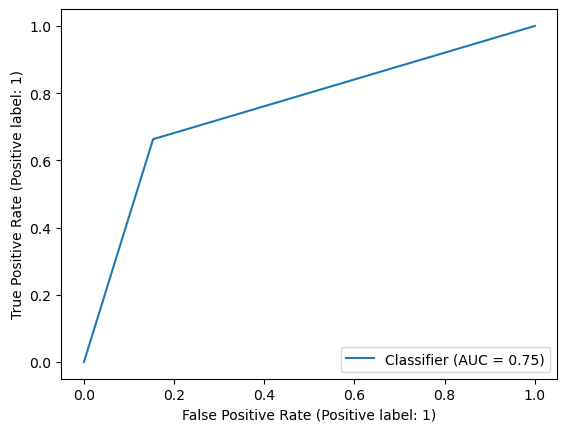

In [16]:
# Curva de precisón del modelo
print("\033[1mCurva de precisón:\033[0m")
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

Matriz de Confusión:


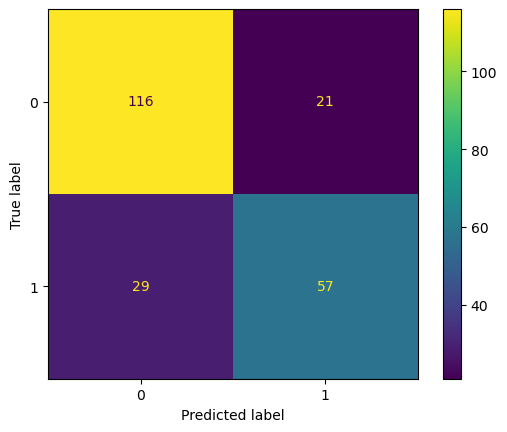

In [17]:
#Matrix de Confusión del modelo
print("\033[1mMatriz de Confusión:\033[0m")
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Matriz de Correlación:


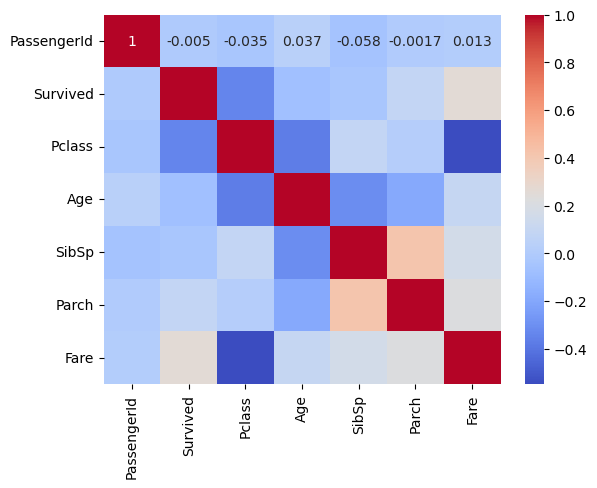

In [18]:
#Matrix de Correlación del modelo
print("\033[1mMatriz de Correlación:\033[0m")
Datos_sin_columna = Datos.drop(columns=['Name','Sex','Ticket','Embarked','Cabin'])
correlation_matrix = Datos_sin_columna.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### 8. Interpretar, analizar y documentar los resultados obtenidos